In [1]:
## allow interaction with the plots
%matplotlib widget

%load_ext autoreload
%autoreload 2

# add the main directory reference and import 'imports.py'
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")
from imports import *


Using: cuda. Device: NVIDIA GeForce RTX 4090


In [13]:
from data.AQ import AQ
from models.RNN import RNN


class Config:
    def __init__(self):
        self.batch_size = 32
        self.seq_len = 48
        self.lr = 0.001
        self.hidden_size = 64
        self.layers = 2
        self.dropout = 0.2
        self.max_epochs = 100
        self.y_len = 1


params = Config()

data = AQ(batch_size=params.batch_size, seq_len=params.seq_len, y_len=params.y_len)
data.preview(samples=1)
sample = data.sample_batch()[0]

model = RNN(
    sample.shape[-1],
    params.hidden_size,
    params.layers,
    y_len=params.y_len,
    flavor="lstm",
)

funcname = row_index -       CO(GT)  PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        2.6      1360.00     150.0        1045.50    166.0       1056.25   
1        2.0      1292.25     112.0         954.75    103.0       1173.75   
2        2.2      1402.00      88.0         939.25    131.0       1140.00   
3        2.2      1375.50      80.0         948.25    172.0       1092.00   
4        1.6      1272.25      51.0         835.50    131.0       1205.00   
...      ...          ...       ...            ...      ...           ...   
9352     3.1      1314.25     275.0        1101.25    471.7        538.50   
9353     2.4      1162.50     275.0        1027.00    353.3        603.75   
9354     2.4      1142.00     275.0        1062.50    293.0        603.25   
9355     2.1      1002.50     275.0         960.50    234.5        701.50   
9356     2.2      1070.75     275.0        1047.25    265.2        654.00   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)       T    

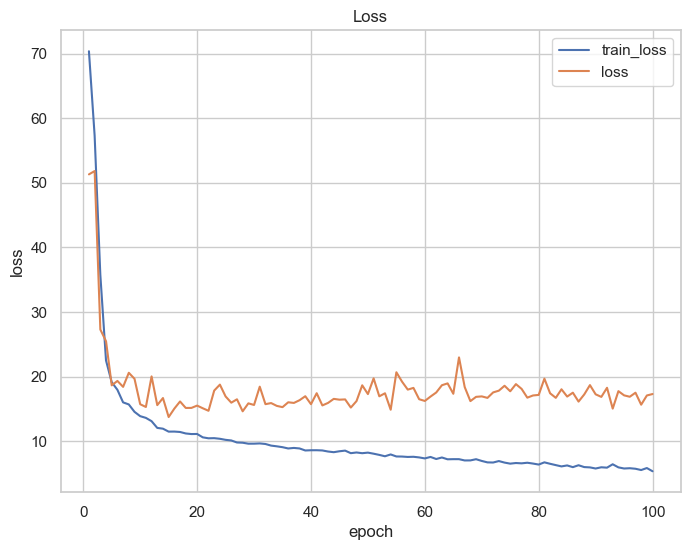

Epochs progress:   0%|          | 0/100 [00:00<?, ?Epoch/s]

1

In [12]:
trainer = Trainer(max_epochs=params.max_epochs, lr=params.lr, loss_every=1)
trainer.fit(model, data.loaders())